<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Customise/DataPipeline/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

#### Load the CIFAR-100 Dataset

In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Examine the shape of the data.
print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape}")
print(f"test labels shape: {test_labels.shape}")

169001437/169001437 [==============================] - 4s 0us/step
train images shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)
test images shape: (10000, 32, 32, 3)
test labels shape: (10000, 1)


#### Examine the Dataset

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [3]:
import os
import json

os.makedirs('./data', exist_ok=True)
# Load the list of labels from a JSON file
with open('./data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

# Print a few of the labels
cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

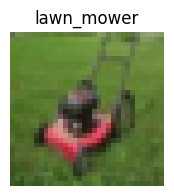

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# Examine one of the images and its corresponding label
plt.figure(figsize=(2, 2))
plt.imshow(X=train_images[500])
# Print the corresponding label for the example above
plt.title(label=cifar100_fine_labels[train_labels[500].item()])
plt.axis('off')
plt.show()

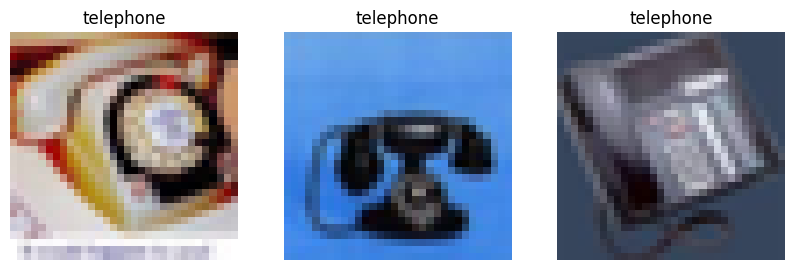

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Display a few examples from category (index 86) and the list of labels
examples = train_images[(train_labels.T==86)[0]][:3]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, img in enumerate(examples):
    ax[i].imshow(X=img)
    ax[i].set_title(label=cifar100_fine_labels[86])
    ax[i].axis('off')
plt.show()

#### Load the data using different label modes

In [ ]:
# Reload the data using the 'coarse' label mode
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.cifar100.load_data(label_mode='coarse')

print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")

train images shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


In [ ]:
# Load the list of coarse labels from a JSON file

with open('./data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [ ]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [ ]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


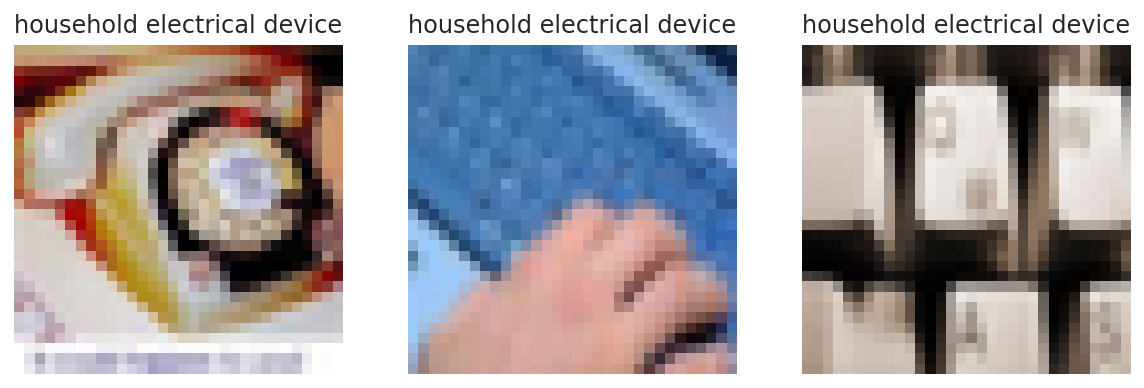

In [ ]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i, img in enumerate(examples):
    ax[i].imshow(img)
    ax[i].set_title(cifar100_coarse_labels[5])
    ax[i].axis('off')
plt.show()

#### Load the IMDB Dataset

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000, max_len=100)

# Print the shape of the training dataset, along with its corresponding label
print(f"train data shape: {train_data.shape}")
print(f"train labels shape: {train_labels.shape}")

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [ ]:
# Load the data ignoring the 50 most frequent words,
# use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(skip_top=50, oov_char=2)

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [ ]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [ ]:
# Remove the oov_char from the sequences using
# the filter_list function

train_data = filter_list(train_data)

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [ ]:
def text_file_reader(filepath):
    with open(filepath, 'r') as f:
        for row in f:
            yield row

text_datagen = text_file_reader('data_file.txt')

next(text_datagen) # 'A line of text\n'
next(text_datagen) # 'Another line of text\n'

In [ ]:
def get_data(batch_size):
    while True:
        y_train = np.random.choice([0, 1], (batch_size, 1))
        x_train = np.random.randn(batch_size, 1) + (2 * y_train - 1)
        yield x_train, y_train

datagen = get_data(32)

x, y = next(datagen)
print(f"x train shape: {x.shape}")
print(f"y train shape: {y.shape}")

x train shape: (32, 1)
y train shape: (32, 1)


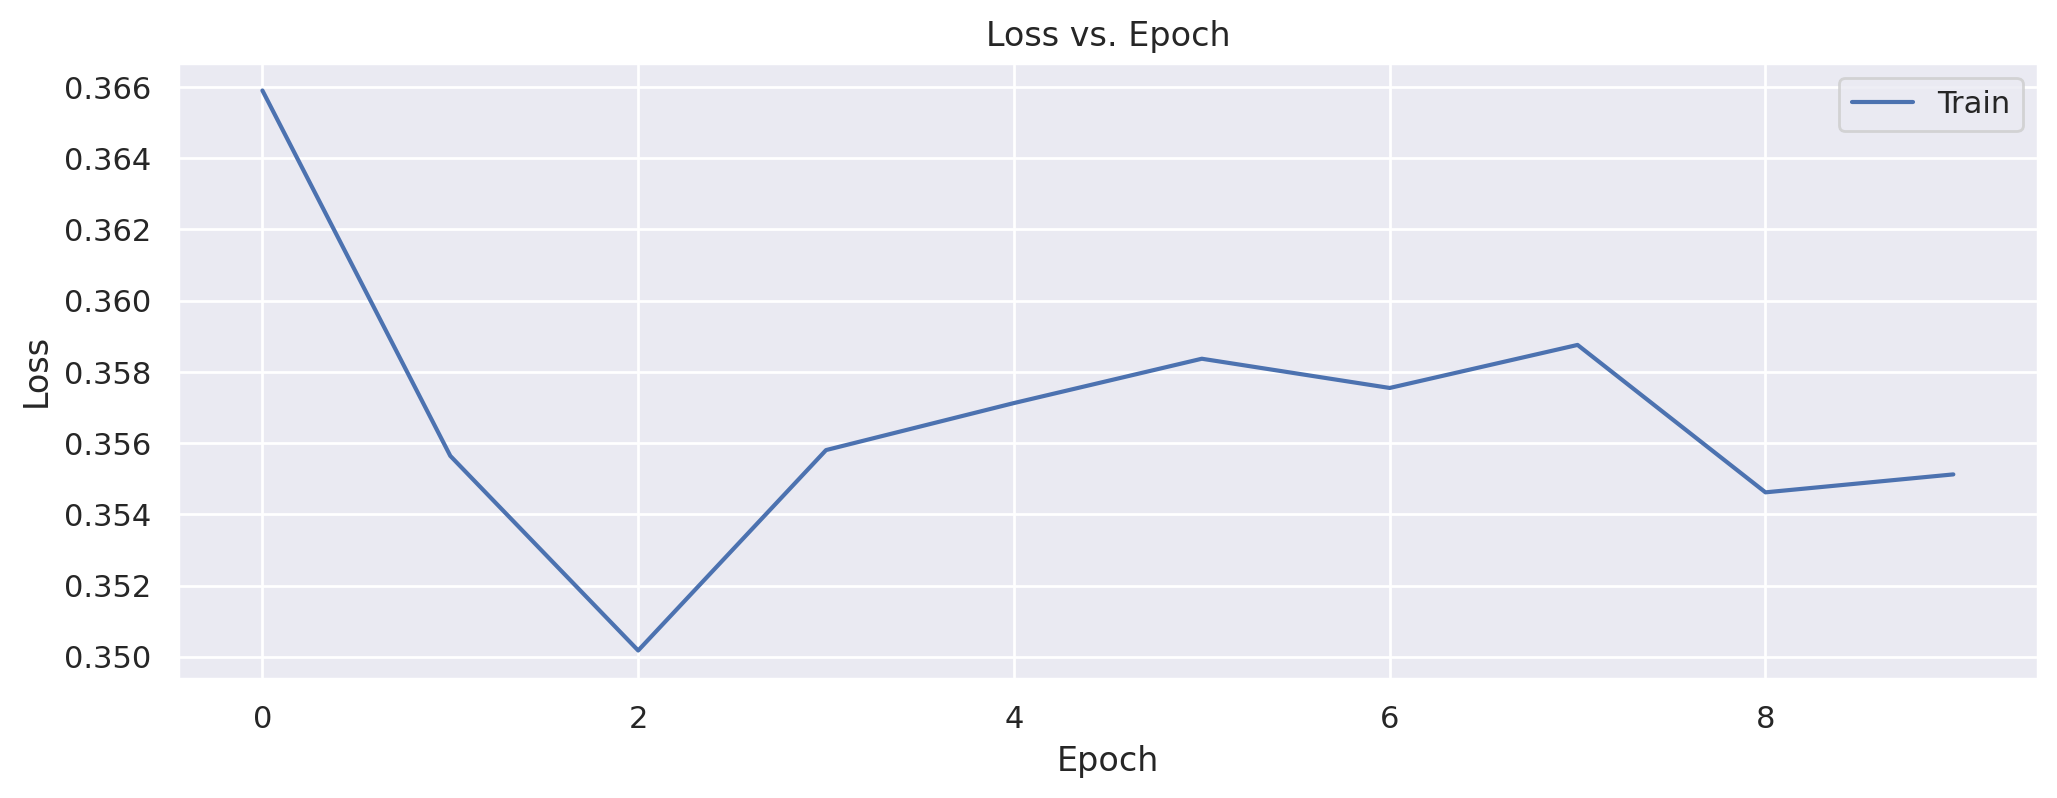

100/100 - 0s - loss: 0.3481 - 440ms/epoch - 4ms/step
100/100 - 0s - 267ms/epoch - 3ms/step


array([[0.01592903],
       [0.00532718],
       [0.05956756],
       ...,
       [0.5326744 ],
       [0.95215446],
       [0.3986907 ]], dtype=float32)

In [ ]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD()
)
history = model.fit(datagen,
    steps_per_epoch=1000, epochs=10,
    verbose=0
)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(history.epoch, history.history['loss'], label='Train')
ax.set_title('Loss vs. Epoch')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend()
plt.show()

datagen_eval = get_data(32)
model.evaluate(datagen_eval, steps=100, verbose=2)

datagen_test = get_data(32)
model.predict(datagen_test, steps=100, verbose=2)

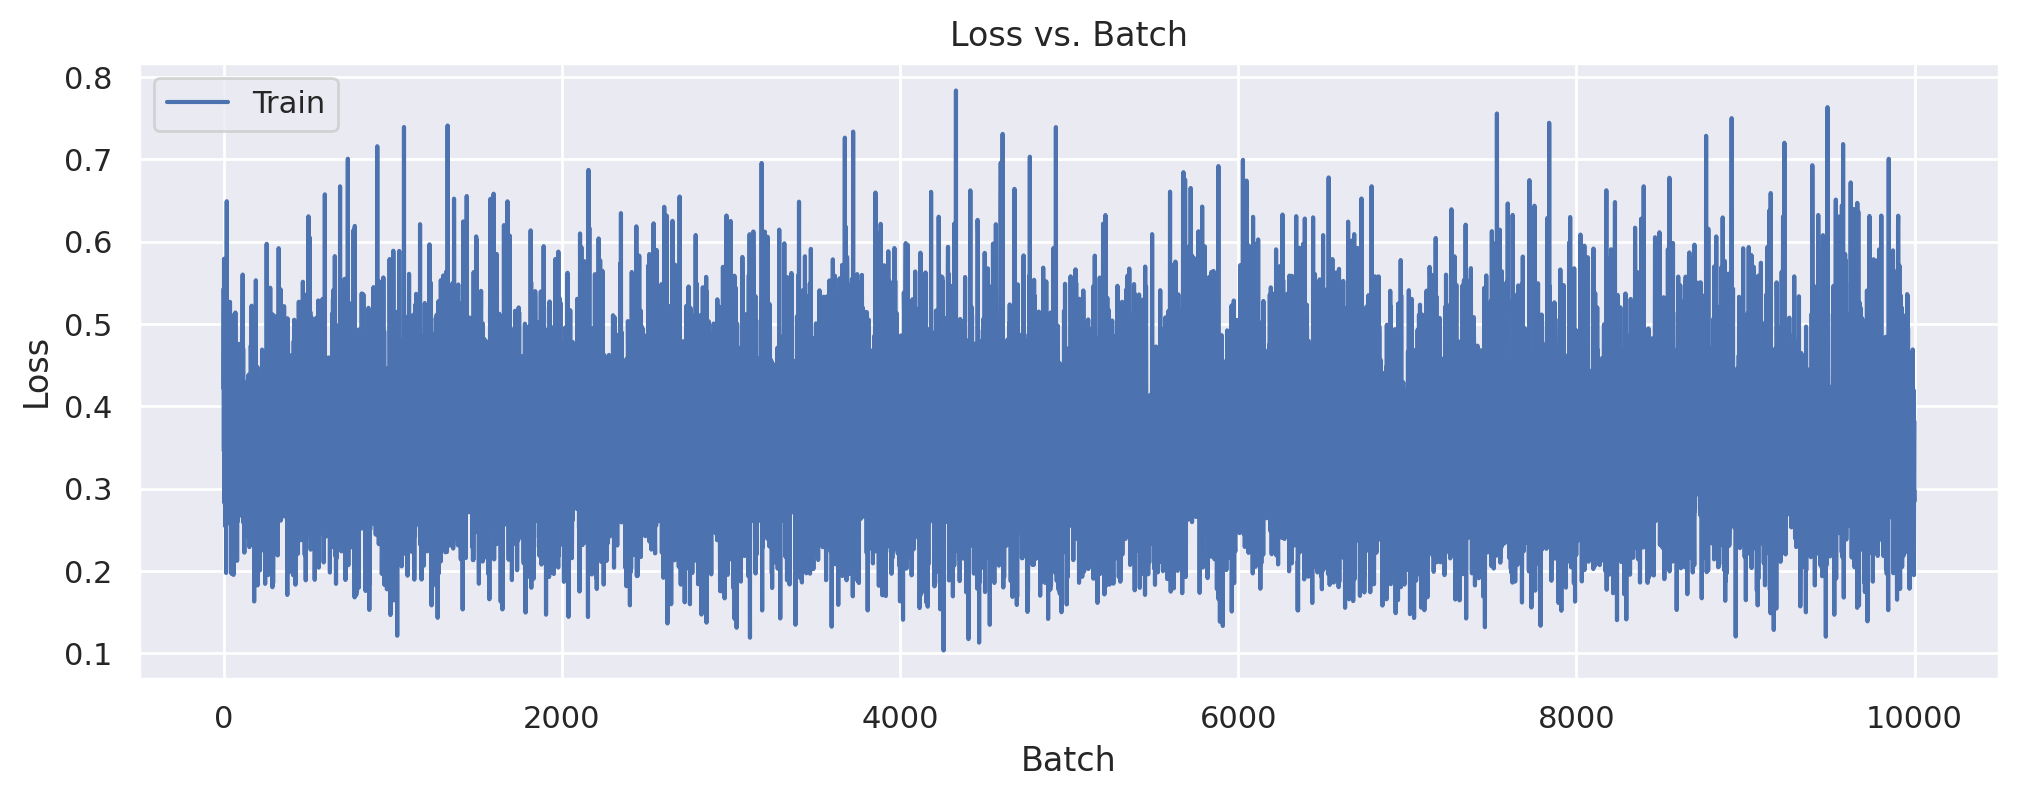

In [ ]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD()
)

losses = []
for _ in range(10000):
    x_train, y_train = next(datagen)
    loss = model.train_on_batch(x=x_train, y=y_train)
    losses.append(loss)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(losses, label='Train')
ax.set_title('Loss vs. Batch')
ax.set_ylabel('Loss')
ax.set_xlabel('Batch')
ax.legend()
plt.show()

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [ ]:
os.makedirs('./data', exist_ok=True)

In [ ]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever',
    'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('./data/fertility_diagnosis.txt', delimiter=',',
    header=None, names=headers)

In [ ]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [ ]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [ ]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [ ]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [ ]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.86,1.0,1.0,1.0,1.0,1.0,-1.0,0.25,0.0
1,-0.33,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,0.0
2,-0.33,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,1.0
3,-1.00,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44,0.0
4,-1.00,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0


In [ ]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.86,1.0,1.0,1.0,1.0,1.0,-1.0,0.25,0.0,0,1,0,0
1,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,0.0,0,1,0,0
2,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,1.0,0,1,0,0
3,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44,0.0,1,0,0,0
4,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0,1,0,0,0


In [ ]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.86,1.0,1.0,1.0,1.0,1.0,-1.0,0.25,0.0,0,1,0,0
1,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,0.0,0,1,0,0
2,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,1.0,0,1,0,0
3,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44,0.0,1,0,0,0
4,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0,1,0,0,0


In [ ]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()
fertility

array([[0.86, 1.  , 1.  , ..., 1.  , 0.  , 0.  ],
       [0.58, 1.  , 1.  , ..., 1.  , 0.  , 0.  ],
       [0.5 , 1.  , 1.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.94, 1.  , 1.  , ..., 0.  , 0.  , 1.  ],
       [0.75, 1.  , 1.  , ..., 0.  , 1.  , 0.  ],
       [0.53, 1.  , 1.  , ..., 1.  , 0.  , 0.  ]], dtype=float32)

#### Split the Data

In [ ]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [ ]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

(70, 13)
(30, 13)


In [ ]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [ ]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (
            features[n*batch_size: (n+1)*batch_size],
            labels[n*batch_size: (n+1)*batch_size]
        )

In [ ]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [ ]:
# Test the generator using the next() function

x, y = next(train_generator)
print(f"x train shape: {x.shape}")
print(f"y train shape: {y.shape}")

x train shape: (10, 12)
y train shape: (10,)


#### Build the model

In [ ]:
# Create a model using Keras with 3 layers

input_shape = (12,)
output_shape = (1,)

def get_model(
    input_shape=input_shape,
    output_shape=output_shape
):
    model_input = tf.keras.Input(shape=input_shape)
    batch_1 = tf.keras.layers.BatchNormalization(momentum=0.8)(model_input)
    dense_1 = tf.keras.layers.Dense(units=100, activation='relu')(batch_1)
    batch_2 = tf.keras.layers.BatchNormalization(momentum=0.8)(dense_1)
    output = tf.keras.layers.Dense(units=1, activation='sigmoid')(batch_2)

    model = tf.keras.Model(inputs=model_input, outputs=output)

    return model

In [ ]:
# Display the model summary to show the resultant structure

model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               1300      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,849
Trainable params: 1,625
Non-trainable par

#### Compile the model

In [ ]:
# Compile the model with optimizer object, loss function and metric

def compile_model(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()])

#### Train and evaluate the model using the generator

In [ ]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size
print(f"train steps: {train_steps:0d}")

train steps: 14


In [ ]:
# Set the epochs to 3

epochs = 3

14/14 - 1s - loss: 0.6893 - binary_accuracy: 0.6571 - val_loss: 0.4977 - val_binary_accuracy: 0.8333 - 1s/epoch - 89ms/step
14/14 - 0s - loss: 0.1832 - binary_accuracy: 0.9143 - val_loss: 0.1792 - val_binary_accuracy: 0.9333 - 129ms/epoch - 9ms/step
14/14 - 0s - loss: 0.0860 - binary_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 1.0000 - 97ms/epoch - 7ms/step


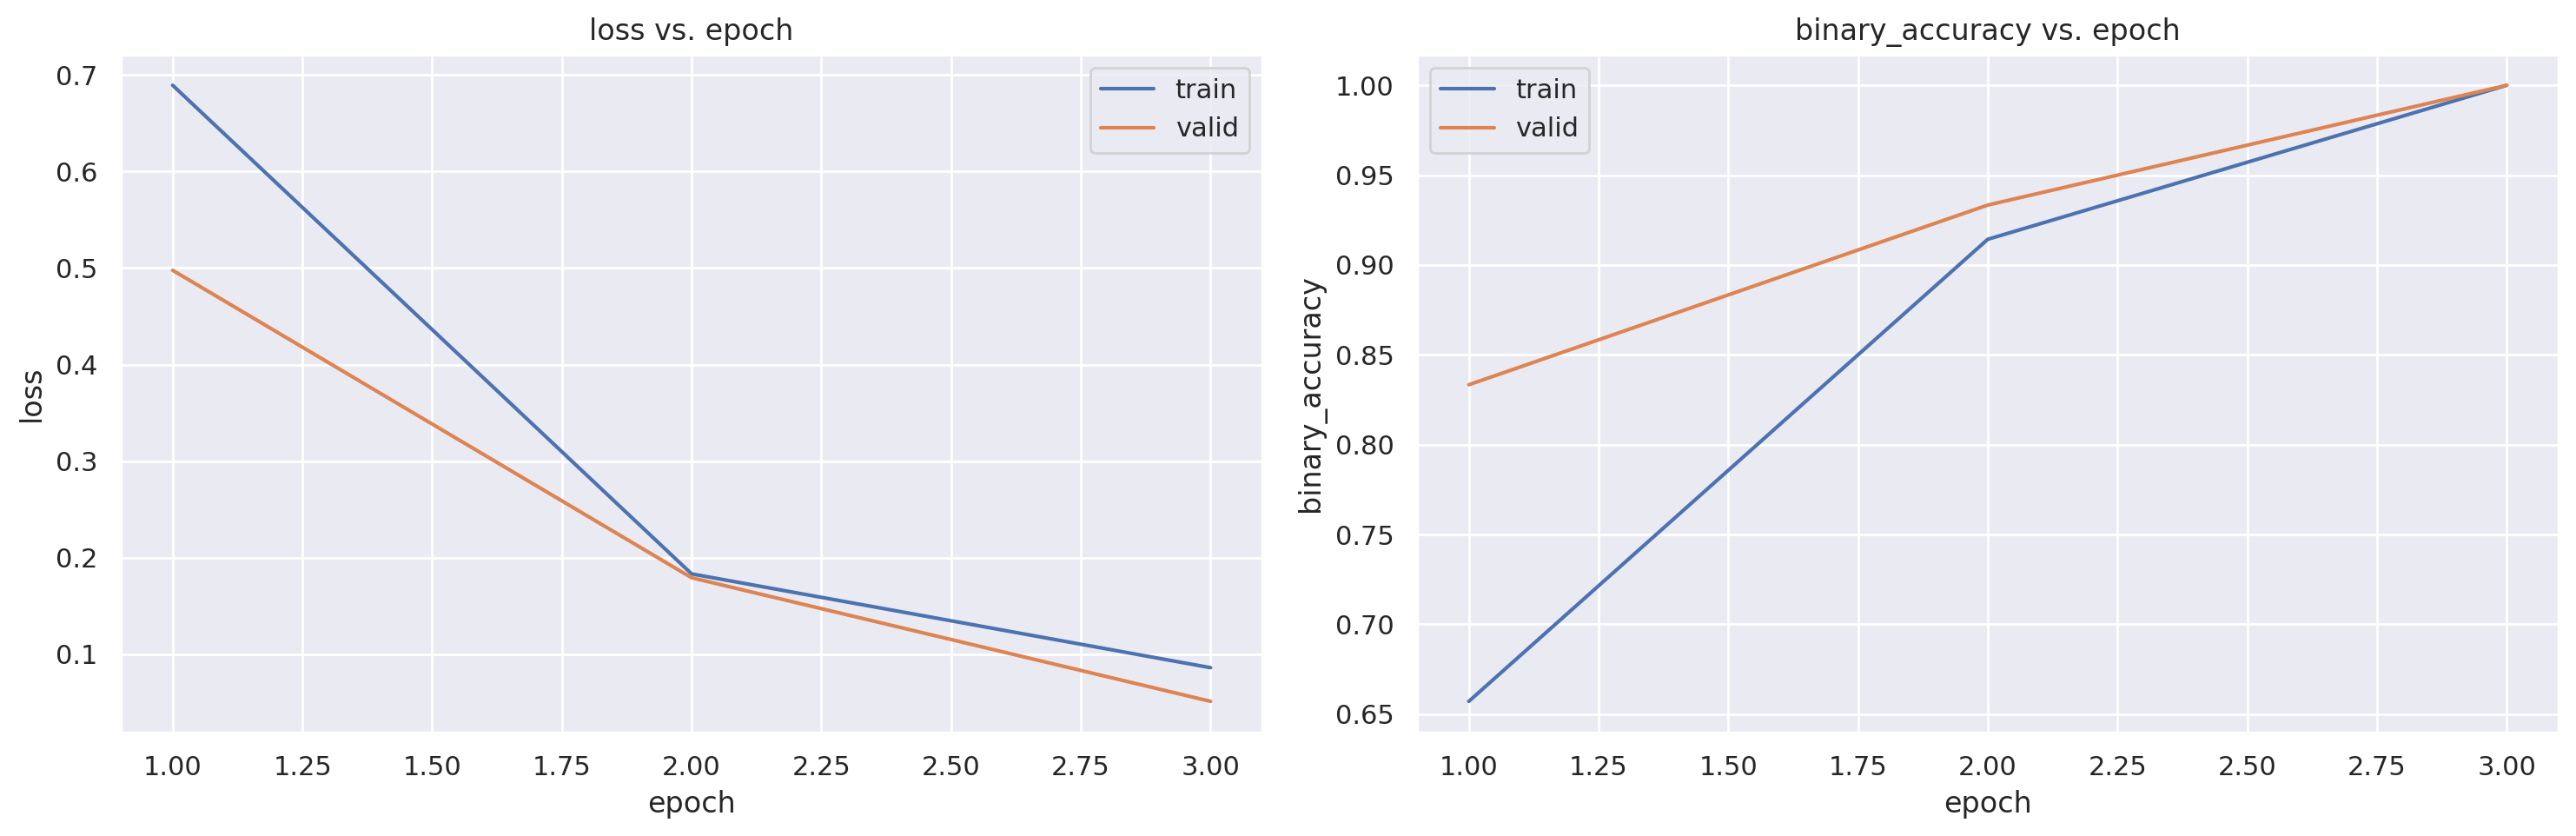

In [ ]:
# Train the model

model = get_model()
compile_model(model)

dfs_history = []
for epoch in range(epochs):
    train_generator = get_generator(training_features,
        training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features,
        validation_labels, batch_size=30)
    history = model.fit(train_generator, steps_per_epoch=train_steps,
        validation_data=validation_generator, validation_steps=1,
        verbose=2)
    dfs_history.append(pd.DataFrame(history.history))

df_history = pd.concat(dfs_history)\
    .reset_index().drop(labels='index', axis=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'binary_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

In [ ]:
# Try to run the fit_generator function once more; observe what happens

model = get_model()
compile_model(model)

model.fit(train_generator, steps_per_epoch=train_steps,
    validation_data=validation_generator, validation_steps=1,
    verbose=2)

StopIteration: 

#### Make an infinitely looping generator

In [ ]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (
                features[n*batch_size: (n+1)*batch_size],
                labels[n*batch_size: (n+1)*batch_size]
            )
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [ ]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(
    training_features, training_labels, batch_size=batch_size)

In [ ]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    x, y = next(train_generator_cyclic)
    print(f"{i}, x shape: {x.shape}, y shape: {y.shape}")

0, x shape: (5, 12), y shape: (5,)
1, x shape: (5, 12), y shape: (5,)
2, x shape: (5, 12), y shape: (5,)
3, x shape: (5, 12), y shape: (5,)
4, x shape: (5, 12), y shape: (5,)
5, x shape: (5, 12), y shape: (5,)
6, x shape: (5, 12), y shape: (5,)
7, x shape: (5, 12), y shape: (5,)
8, x shape: (5, 12), y shape: (5,)
9, x shape: (5, 12), y shape: (5,)
10, x shape: (5, 12), y shape: (5,)
11, x shape: (5, 12), y shape: (5,)
12, x shape: (5, 12), y shape: (5,)
13, x shape: (5, 12), y shape: (5,)
14, x shape: (5, 12), y shape: (5,)
15, x shape: (5, 12), y shape: (5,)
16, x shape: (5, 12), y shape: (5,)
17, x shape: (5, 12), y shape: (5,)
18, x shape: (5, 12), y shape: (5,)
19, x shape: (5, 12), y shape: (5,)
20, x shape: (5, 12), y shape: (5,)
21, x shape: (5, 12), y shape: (5,)
22, x shape: (5, 12), y shape: (5,)
23, x shape: (5, 12), y shape: (5,)
24, x shape: (5, 12), y shape: (5,)
25, x shape: (5, 12), y shape: (5,)
26, x shape: (5, 12), y shape: (5,)
27, x shape: (5, 12), y shape: (5,)


In [ ]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(
    validation_features, validation_labels, batch_size=batch_size)

Epoch 1/3
14/14 - 1s - loss: 0.7310 - binary_accuracy: 0.6714 - val_loss: 0.1054 - val_binary_accuracy: 1.0000 - 1s/epoch - 82ms/step
Epoch 2/3
14/14 - 0s - loss: 0.1236 - binary_accuracy: 0.9571 - val_loss: 0.3122 - val_binary_accuracy: 0.8000 - 66ms/epoch - 5ms/step
Epoch 3/3
14/14 - 0s - loss: 0.1065 - binary_accuracy: 0.9714 - val_loss: 0.0104 - val_binary_accuracy: 1.0000 - 67ms/epoch - 5ms/step


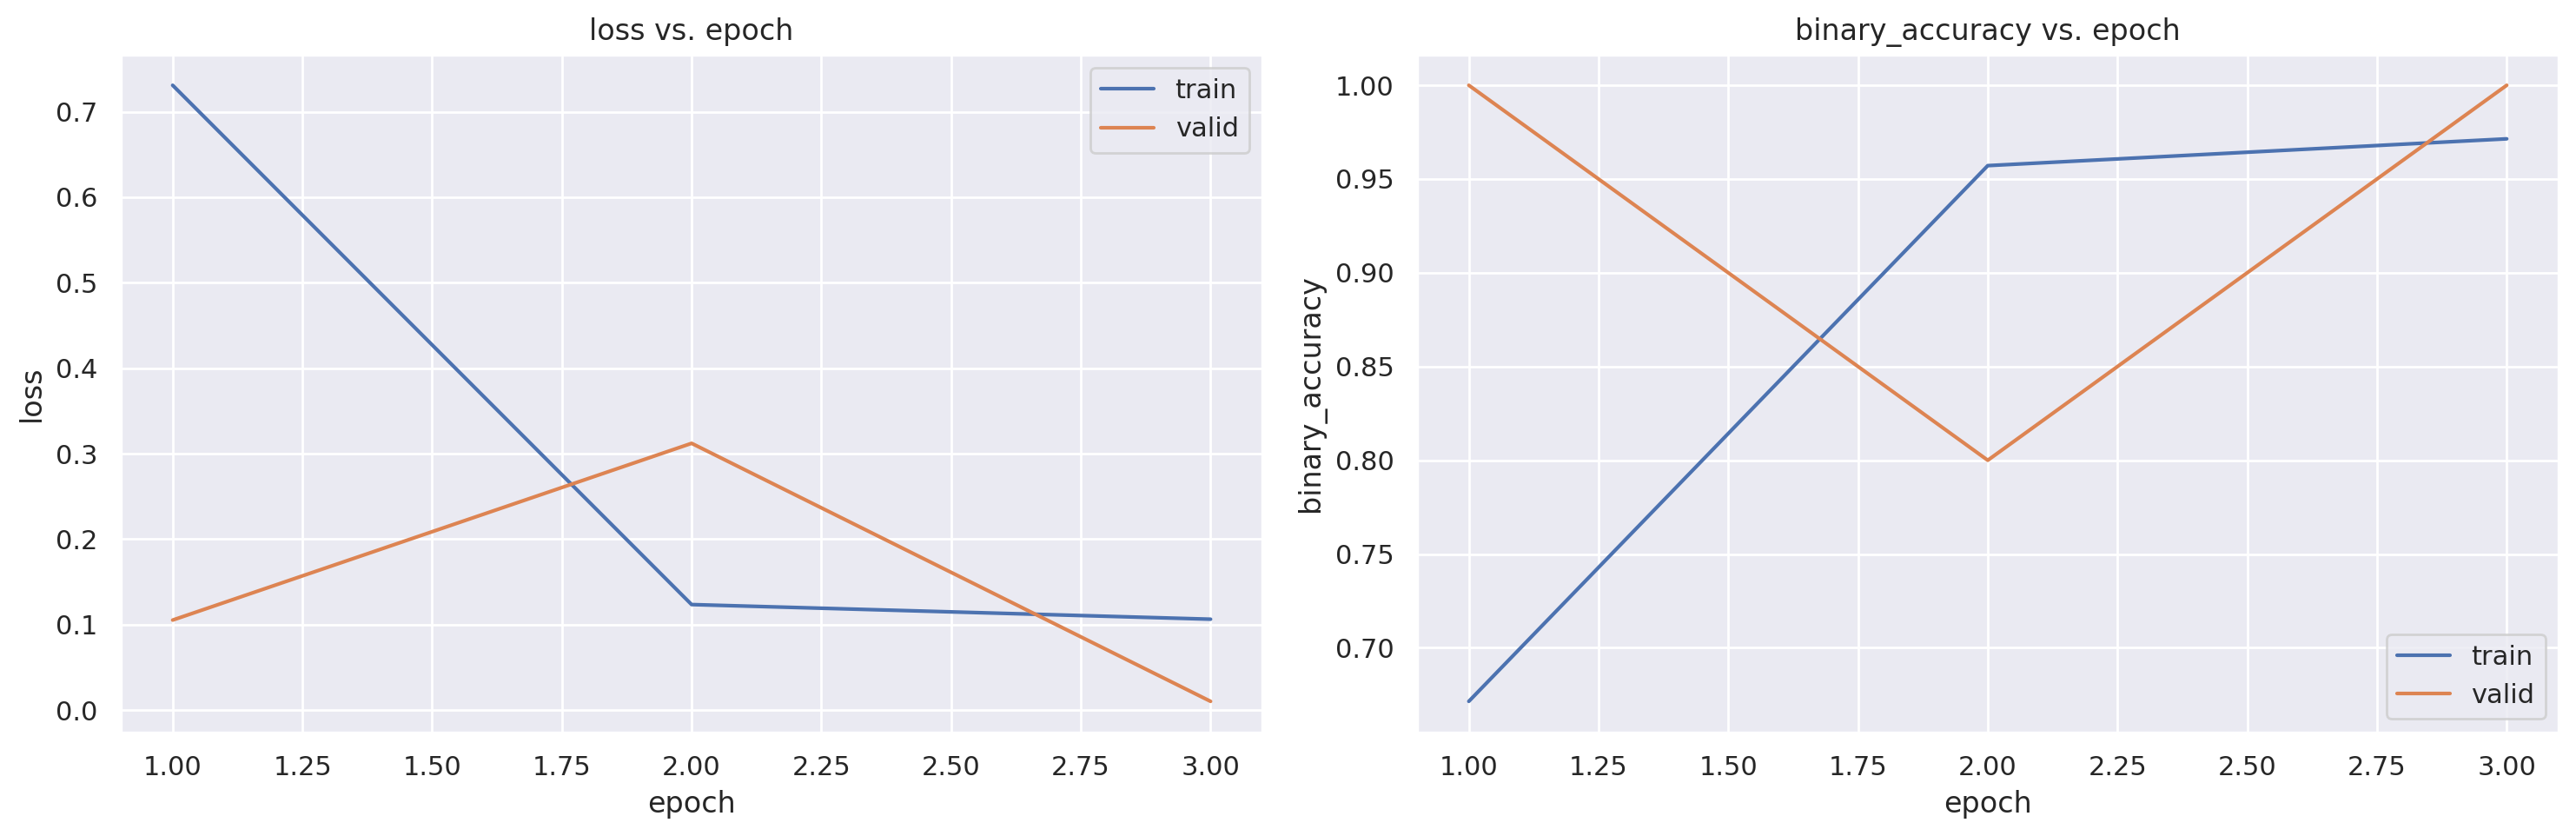

In [ ]:
# Train the model

model = get_model()
compile_model(model)

history = model.fit(train_generator_cyclic, steps_per_epoch=train_steps,
    validation_data=validation_generator_cyclic, validation_steps=1,
    epochs=3, verbose=2)

df_history = pd.DataFrame(history.history,
    index=history.epoch)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'binary_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

#### Evaluate the model and get predictions

In [ ]:
# Let's obtain a validation data generator.

validation_generator_cyclic = get_generator_cyclic(
    validation_features, validation_labels, batch_size=30)

In [ ]:
# Get predictions on the validation data

predictions = model.predict(validation_generator_cyclic,
    steps=1, verbose=0)
print(np.round(predictions.T[0]))

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0.]


In [ ]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0.]


In [ ]:
# Evaluate the model

evaluation = model.evaluate(
    validation_generator_cyclic, steps=1, verbose=0)
print(evaluation)

[0.044309116899967194, 1.0]


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

image_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255., horizontal_flip=True, height_shift_range=0.2,
    fill_mode='nearest',featurewise_center=True) # aaaa|abcd|dddd

image_data_gen.fit(x_train)

train_datagen = image_data_gen.flow(
    x_train, y_train, batch_size=16)

model.fit(train_datagen, epochs=20)

#### Load the CIFAR-10 Dataset

In [ ]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = \
    tf.keras.datasets.cifar10.load_data()

 18505728/170498071 [==>...........................] - ETA: 2:27:45

In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(
    y=training_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(
    y=test_labels, num_classes=num_classes)

#### Create a generator function

In [ ]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (
            features[n*batch_size: (n+1)*batch_size],
            labels[n*batch_size: (n+1)*batch_size]
        )

In [ ]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(
    training_features, training_labels)

In [ ]:
# Assess the shape of the items generated by training_generator using the
# `next` function to yield an item.

image, label = next(training_generator)
print(f"image shape: {image.shape}")
print(f"label shape: {label.shape}")

image shape: (1, 32, 32, 3)
label shape: (1, 10)


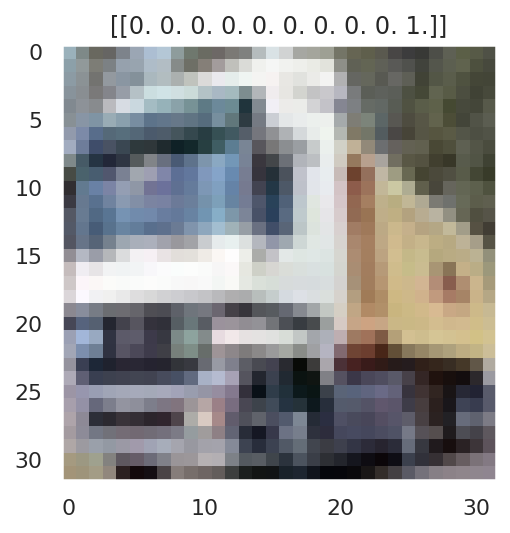

In [ ]:
# Test the training generator by obtaining an image using the
# `next` generator function, and then using imshow to plot it.
# Print the corresponding label

image, label = next(training_generator)
image_unbatched = np.squeeze(image)
plt.imshow(image_unbatched)
plt.title(str(label))
plt.grid(visible=None)
plt.show()

In [ ]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(
    training_features, training_labels)

#### Create a data augmention generator

In [ ]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [ ]:
# Create an ImageDataGenerator object

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180, rescale=1/255.0)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options.

In [ ]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(
    training_features, training_labels,
    batch_size=1, shuffle=False)

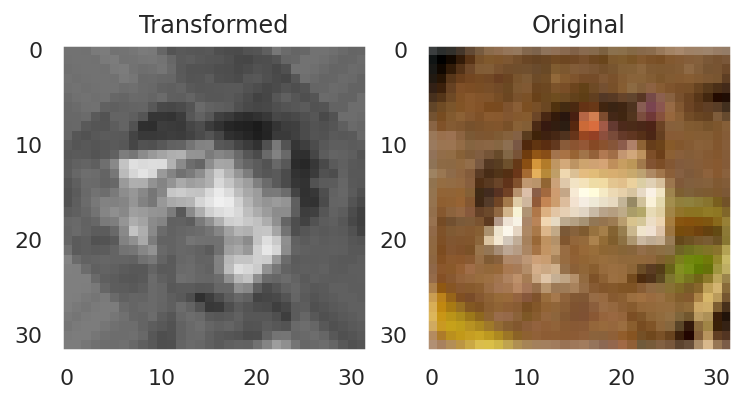

In [ ]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.squeeze(image))
ax[0].set_title('Transformed')
ax[0].grid(visible=None)
ax[1].imshow(np.squeeze(image_orig))
ax[1].set_title('Original')
ax[1].grid(visible=None)
plt.show()

#### Flow from directory

In [ ]:
os.makedirs('./data', exist_ok=True)

In [ ]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [ ]:
# Create an ImageDataGenerator object

datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.)

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(
    directory=train_path, batch_size=64, classes=classes,
    target_size=(16, 16))

Found 3027 images belonging to 5 classes.


In [ ]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(
    directory=val_path, batch_size=64, classes=classes,
    target_size=(16,16))

Found 1296 images belonging to 5 classes.


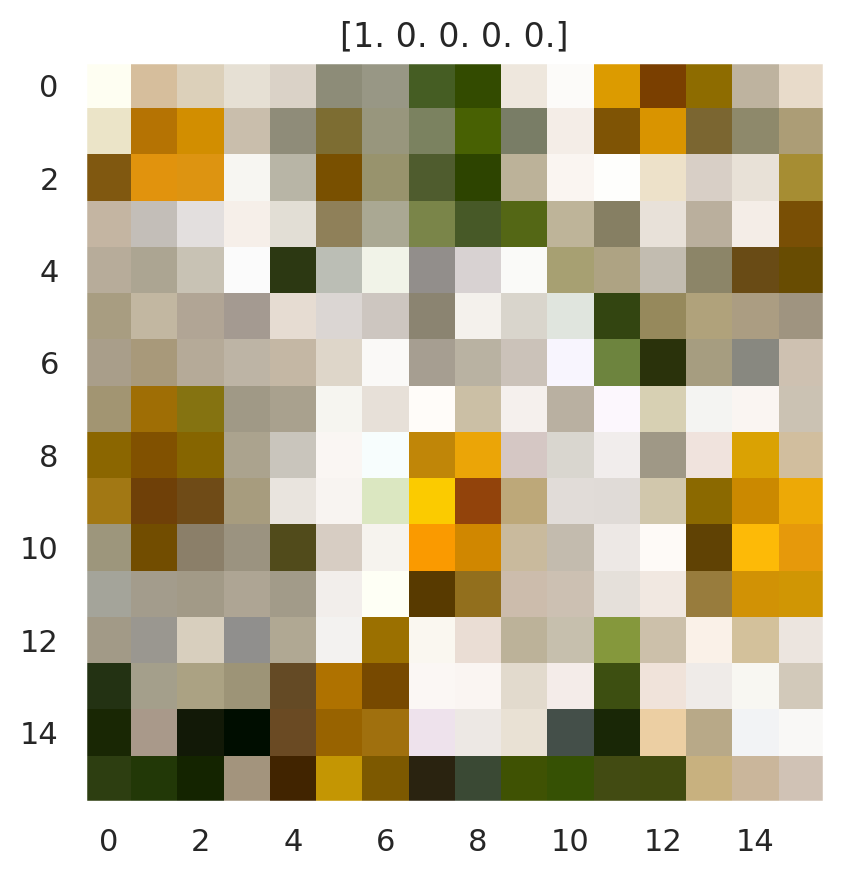

In [ ]:
# Get and display an image and label from the training generator

x = next(train_generator)
plt.imshow(x[0][8])
plt.title(str(x[1][8]))
plt.grid(visible=None)
plt.show()

In [ ]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(
    directory=train_path, batch_size=64, classes=classes,
    target_size=(16, 16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [ ]:
# Build a CNN model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16, 16, 3)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(8, 8),
    padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(8, 8),
    padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(4, 4),
    padding='same', activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [ ]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
# Compile the model

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         1544      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           4104      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 4)           516       
                                                                 
 flatten (Flatten)           (None, 16)                0

#### Train the model

In [ ]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(f"train steps per epoch: {train_steps_per_epoch}\
    \nvalid steps: {val_steps}")

train steps per epoch: 47    
valid steps: 20


Epoch 1/5
47/47 - 7s - loss: 1.5952 - categorical_accuracy: 0.2551 - 7s/epoch - 146ms/step
Epoch 2/5
47/47 - 4s - loss: 1.5341 - categorical_accuracy: 0.2626 - 4s/epoch - 91ms/step
Epoch 3/5
47/47 - 5s - loss: 1.4741 - categorical_accuracy: 0.2970 - 5s/epoch - 107ms/step
Epoch 4/5
47/47 - 5s - loss: 1.4485 - categorical_accuracy: 0.3318 - 5s/epoch - 97ms/step
Epoch 5/5
47/47 - 4s - loss: 1.4018 - categorical_accuracy: 0.3480 - 4s/epoch - 95ms/step


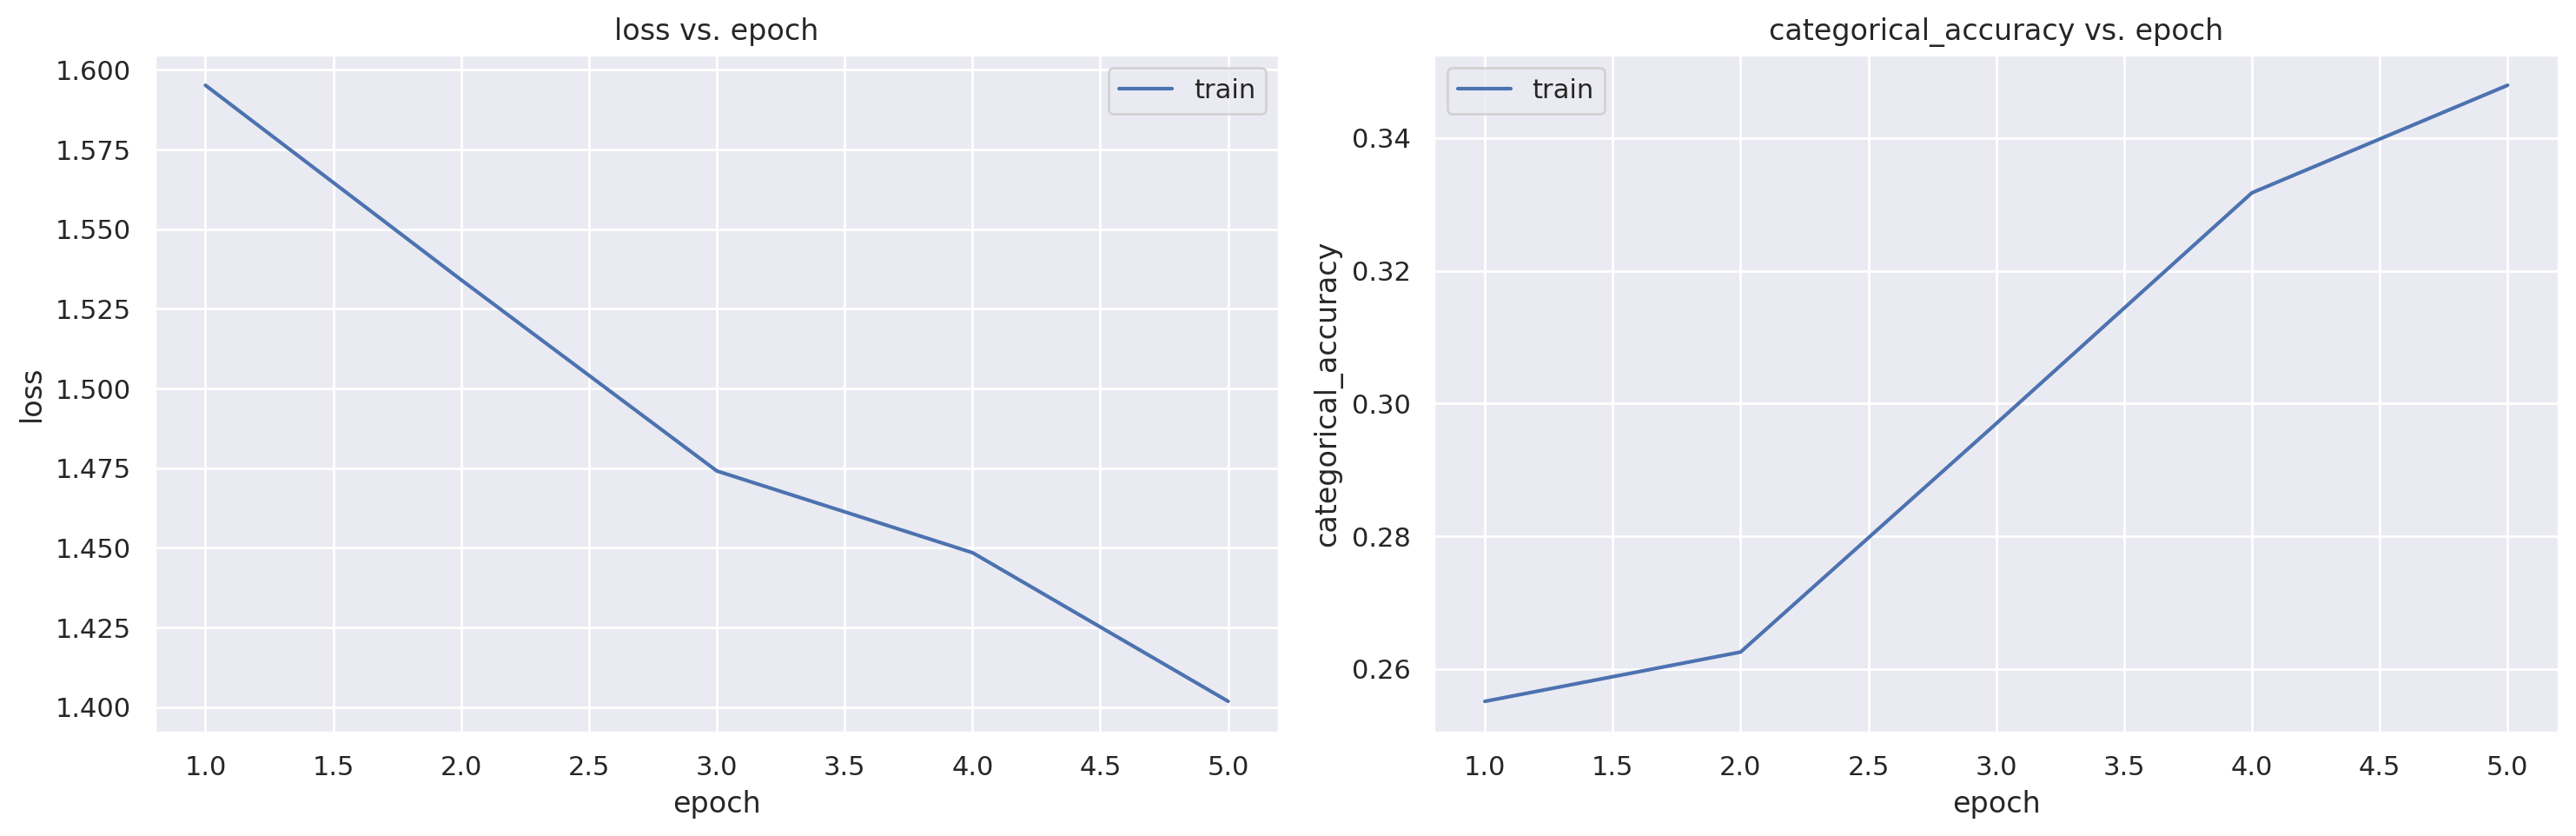

In [ ]:
# Fit the model

history = model.fit(train_generator,
    steps_per_epoch=train_steps_per_epoch, epochs=5,
    verbose=2)

df_history = pd.DataFrame(history.history, index=history.epoch)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'categorical_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

#### Evaluate the model

In [ ]:
# Evaluate the model

loss, accuracy = model.evaluate(
    val_generator, steps=val_steps, verbose=0)
print(f"loss: {loss:.2f}, accuracy: {accuracy:.2f}")

loss: 1.36, accuracy: 0.34


#### Predict using the generator

In [ ]:
# Predict labels with the model

predictions = model.predict(val_generator, steps=1, verbose=0)
print([classes[i] for i in np.argmax(predictions, axis=1)])

['sunflower', 'tulip', 'daisy', 'dandelion', 'rose', 'sunflower', 'rose', 'rose', 'tulip', 'tulip', 'sunflower', 'rose', 'sunflower', 'dandelion', 'dandelion', 'tulip', 'sunflower', 'rose', 'dandelion', 'dandelion', 'tulip', 'dandelion', 'dandelion', 'sunflower', 'sunflower', 'tulip', 'dandelion', 'dandelion', 'sunflower', 'tulip', 'tulip', 'rose', 'rose', 'daisy', 'daisy', 'sunflower', 'tulip', 'rose', 'dandelion', 'tulip', 'sunflower', 'rose', 'dandelion', 'sunflower', 'tulip', 'tulip', 'tulip', 'tulip', 'sunflower', 'rose', 'sunflower', 'tulip', 'rose', 'tulip', 'dandelion', 'rose', 'dandelion', 'dandelion', 'sunflower', 'sunflower', 'dandelion', 'rose', 'rose', 'rose']


***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(
    tensors=[1, 2, 3, 4, 5, 6])
print(dataset)

dataset = tf.data.Dataset.from_tensor_slices(
    tensors=[[1, 2], [3, 4], [5, 6]])
print(dataset)

for elem in dataset:
    print(elem, elem.numpy())

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(2,), dtype=tf.int32, name=None)>
tf.Tensor([1 2], shape=(2,), dtype=int32) [1 2]
tf.Tensor([3 4], shape=(2,), dtype=int32) [3 4]
tf.Tensor([5 6], shape=(2,), dtype=int32) [5 6]


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(
    tensors=tf.random.uniform(shape=[128, 5]))
print(dataset.element_spec)

TensorSpec(shape=(5,), dtype=tf.float32, name=None)


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(tensors=(
    tf.random.uniform(shape=[256, 4], minval=1, maxval=10, dtype=tf.int32),
    tf.random.normal(shape=[256])
))
print(dataset.element_spec)

for elem in dataset.take(2):
    print(elem)

(TensorSpec(shape=(4,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([9, 1, 3, 1], dtype=int32)>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009246494>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 3, 1, 8], dtype=int32)>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.66206276>)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices(tensors=(x_train, y_train))
print(dataset.element_spec)

img_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2, horizontal_flip=True)
dataset = tf.data.Dataset.from_generator(
    generator=img_datagen.flow, args=[x_train, y_train],
    output_types=(tf.float32, tf.int32),
    output_shapes=([32, 32, 32, 3], [32, 1])
)
print(dataset.element_spec)

170498071/170498071 [==============================] - 2s 0us/step
(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(32, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))


#### Create a simple dataset

In [ ]:
x = np.zeros(shape=(100, 10, 2, 2))

In [ ]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(tensors=x)

In [ ]:
# Inspect the Dataset object

print(dataset1)
print(dataset1.element_spec)

for elem in dataset1.take(1):
    print(elem)

<TensorSliceDataset element_spec=TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)
tf.Tensor(
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]], shape=(10, 2, 2), dtype=float64)


In [ ]:
x2 = [np.zeros(shape=(10, 2, 2)), np.zeros(shape=(5, 2, 2))]

In [ ]:
# Try creating a dataset from the tensor x2

dataset2 = tf.data.Dataset.from_tensor_slices(tensors=x2)

ValueError: ignored

In [ ]:
x2 = [np.zeros(shape=(10, 1)), np.zeros(shape=(10, 1)), np.zeros(shape=(10, 1))]

In [ ]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(tensors=x2)

In [ ]:
# Print the element_spec

print(dataset2.element_spec)

for elem in dataset2.take(1):
    print(elem)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float64)


#### Create a zipped dataset

In [ ]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip(datasets=(dataset1, dataset2))

In [ ]:
# Print the element_spec

print(dataset_zipped.element_spec)

for elem in dataset_zipped.take(1):
    print(elem)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))
(<tf.Tensor: shape=(10, 2, 2), dtype=float64, numpy=
array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])>, <tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])>)


In [ ]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [ ]:
# Find the number of batches in the zipped Dataset

print(f"Number of batches: {get_batches(dataset_zipped)}")

Number of batches: 3


#### Create a dataset from numpy arrays

In [ ]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = \
    tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices(
    (train_features, train_labels))

In [ ]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [ ]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))
print(f"Length of an element: {len(element)}")

Length of an element: 2


In [ ]:
# Examine the shapes of the data

print(f"x train shape: {element[0].shape}")
print(f"y train shape: {element[1].shape}")

x train shape: (28, 28)
y train shape: ()


#### Create a dataset from text data

In [ ]:
os.makedirs(name="./data/shakespeare",
    exist_ok=True)

In [ ]:
# Print the list of text files

text_files = sorted([f.path for f in
    os.scandir(path="./data/shakespeare")])

print(text_files)

['./data/shakespeare/tempest.1.1.txt', './data/shakespeare/tempest.1.2.txt', './data/shakespeare/tempest.2.1.txt', './data/shakespeare/tempest.2.2.txt', './data/shakespeare/tempest.3.1.txt', './data/shakespeare/tempest.3.2.txt', './data/shakespeare/tempest.3.3.txt', './data/shakespeare/tempest.4.1.txt', './data/shakespeare/tempest.5.1.txt']


In [ ]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as f:
    contents = [f.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [ ]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(
    filenames=text_files)

In [ ]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [ ]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as f:
    line = f.readline()
    while line:
        lines.append(line)
        line = f.readline()
    print(f"Number of lines: {len(lines)}")

Number of lines: 121


In [ ]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(f"Number of lines: {len(lines)}")

Number of lines: 3134


#### Interleave lines from the text data files

In [ ]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(
    tensors=text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'./data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'./data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [ ]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(
    map_func=tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [ ]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in
    iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    tensors=(x_train, y_train))
dataset = dataset.batch(batch_size=16, drop_remainder=True)
print(dataset.element_spec)
dataset = dataset.repeat(count=10)

history = model.fit(dataset)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    tensors=(x_train, y_train))

def rescale(image, label):
    return image/255., label

dataset = dataset.map(map_func=rescale)

def label_filter(image, label):
    return tf.squeeze(label)!=9

dataset = dataset.filter(predicate=label_filter)
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(batch_size=16, drop_remainder=True)
print(dataset.element_spec)
dataset = dataset.repeat()

history = model.fit(dataset, steps_per_epoch=x_train.shape[0]//16,
    epochs=10)

#### Load the UCI Bank Marketing Dataset

In [ ]:
os.makedirs(name="./data/bank", exist_ok=True)

In [ ]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('./data/bank/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Print the shape of the DataFrame

print(f"data shape: {bank_dataframe.shape}")

data shape: (45211, 17)


In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance',
    'housing', 'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

print(f"data shape: {bank_dataframe.shape}")
bank_dataframe.head()

data shape: (45211, 13)


,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan',
    'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(
        bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

print(bank_dataframe.head())

   age                                   job  marital     education default  \
0   58  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  married  [0, 0, 1, 0]     [0]   
1   44  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]   single  [0, 1, 0, 0]     [0]   
2   33  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  married  [0, 1, 0, 0]     [0]   
3   47  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  married  [0, 0, 0, 1]     [0]   
4   33  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]   single  [0, 0, 0, 1]     [0]   

   balance housing loan    contact  campaign  pdays      poutcome   y  
0     2143     [1]  [0]  [0, 0, 1]         1     -1  [0, 0, 0, 1]  no  
1       29     [1]  [0]  [0, 0, 1]         1     -1  [0, 0, 0, 1]  no  
2        2     [1]  [1]  [0, 0, 1]         1     -1  [0, 0, 0, 1]  no  
3     1506     [1]  [0]  [0, 0, 1]         1     -1  [0, 0, 0, 1]  no  
4        1     [0]  [0]  [0, 0, 1]         1     -1  [0, 0, 0, 1]  no  


In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1)\
    .reset_index(drop=True)

#### Create the Dataset object

In [ ]:
# Convert the DataFrame to a Dataset

dict_bank = dict(bank_dataframe)
bank_dataset = tf.data.Dataset.from_tensor_slices(
    tensors={k: dict_bank[k].tolist() for k in dict_bank})

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(predicate=lambda x:
    tf.equal(x['marital'], tf.constant([b'divorced']))[0])

In [ ]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 0 if (x['y']==tf.constant([b'no'], dtype=tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_func=map_label)

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [ ]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(map_func=lambda x:
    {key: val for key, val in x.items() if key!='marital'})

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'],
        x['default'], x['education'], x['housing'], x['job'], x['loan'],
        [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_func=map_feature_label)

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(f"dataset length: {dataset_length}")

dataset length: 5207


In [ ]:
bank_dataset_iterator = iter(bank_dataset)
dataset_length = 0
try:
    while next(bank_dataset_iterator):
        dataset_length += 1
except Exception:
    pass
print(f"dataset length: {dataset_length}")

dataset length: 5207


In [ ]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(count=training_elements)
valid_dataset = bank_dataset.skip(count=training_elements)

print(f"train dataset element spec: {train_dataset.element_spec}")
print(f"valid dataset element spec: {valid_dataset.element_spec}")

train dataset element spec: (TensorSpec(shape=(30,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))
valid dataset element spec: (TensorSpec(shape=(30,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(30,)))
model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
# Show the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 400)               12400     
                                                                 
 batch_normalization_1 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 batch_normalization_2 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                        

#### Train the model

In [ ]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(
    batch_size=20, drop_remainder=True)
print(f"train dataset element spec: {train_dataset.element_spec}")

valid_dataset = valid_dataset.batch(
    batch_size=100)
print(f"valid dataset element spec: {valid_dataset.element_spec}")

train dataset element spec: (TensorSpec(shape=(20, 30), dtype=tf.int64, name=None), TensorSpec(shape=(20,), dtype=tf.int32, name=None))
valid dataset element spec: (TensorSpec(shape=(None, 30), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [ ]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(buffer_size=1000)

In [ ]:
# Fit the model

history = model.fit(train_dataset, validation_data=valid_dataset,
    epochs=5, verbose=0)
df_history = pd.DataFrame(history.history, index=history.epoch)

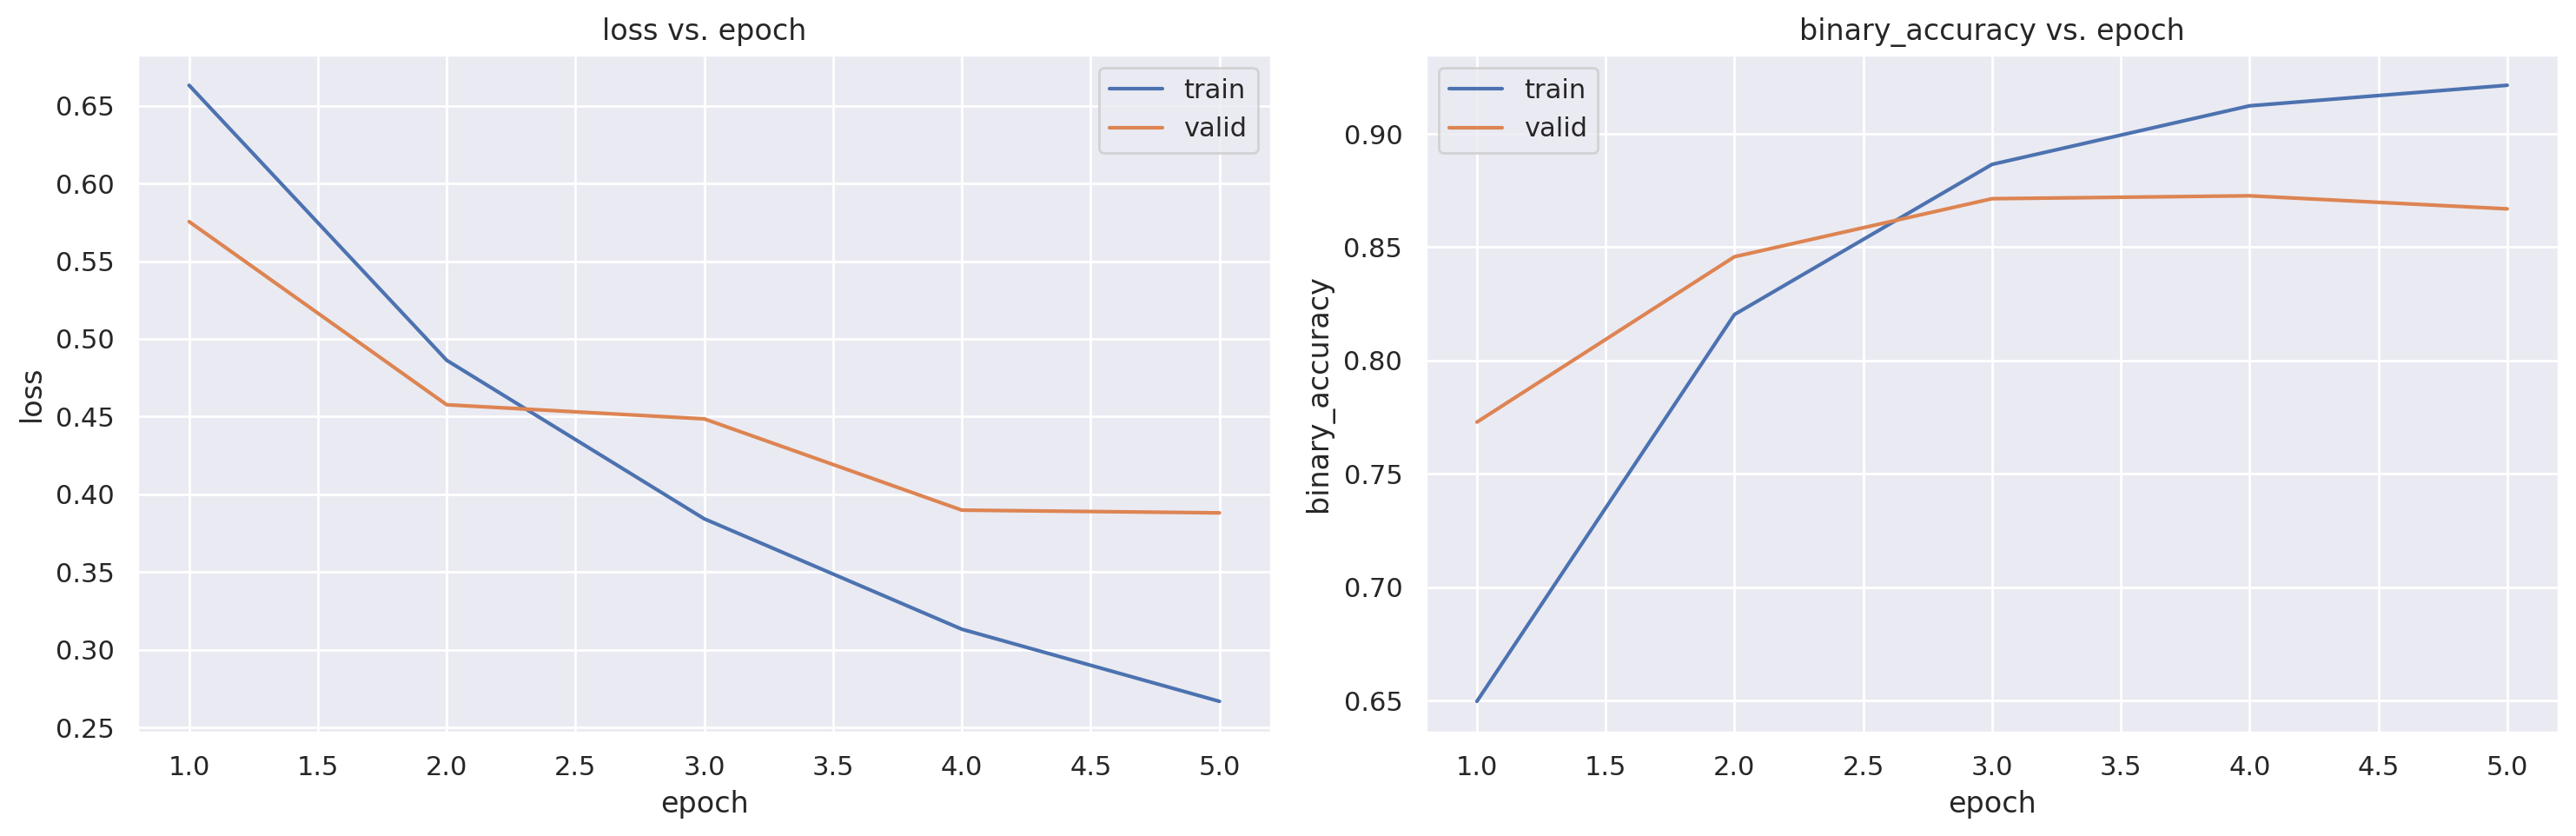

In [ ]:
# Plot the training and validation accuracy

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'binary_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()